<a href="https://colab.research.google.com/github/mluanastevensc/100DayOfCode/blob/main/REITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_excel('QuiltData.xlsx', index_col = 'Year',parse_dates = True,sheet_name="REITS")

In [5]:
df.index.freq='YS'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2000-01-01 to 2020-01-01
Freq: AS-JAN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REITS   21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


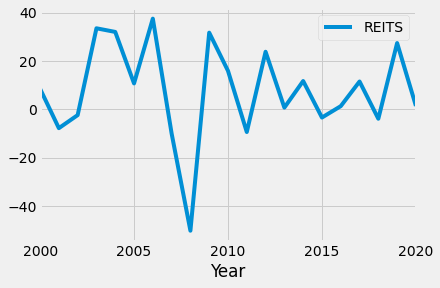

In [7]:
df.plot()

In [9]:
train = df.iloc[:15]

In [10]:
test = df.iloc[15:]

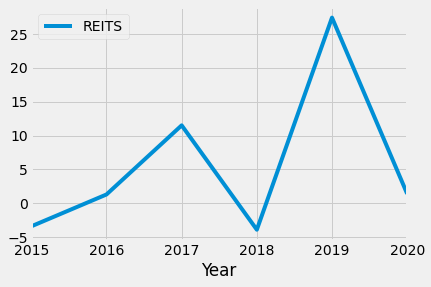

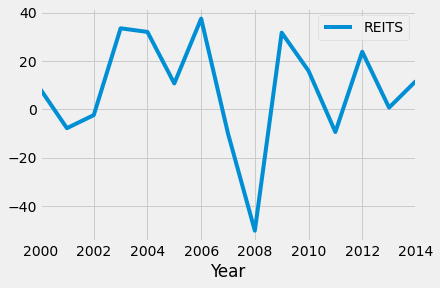

In [11]:
test.plot()
train.plot()

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
model = ExponentialSmoothing(train['REITS'],trend='add',seasonal ='add', seasonal_periods = 5).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


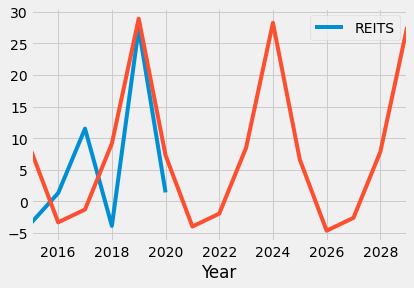

In [16]:
test.plot()
model.forecast(15).plot()

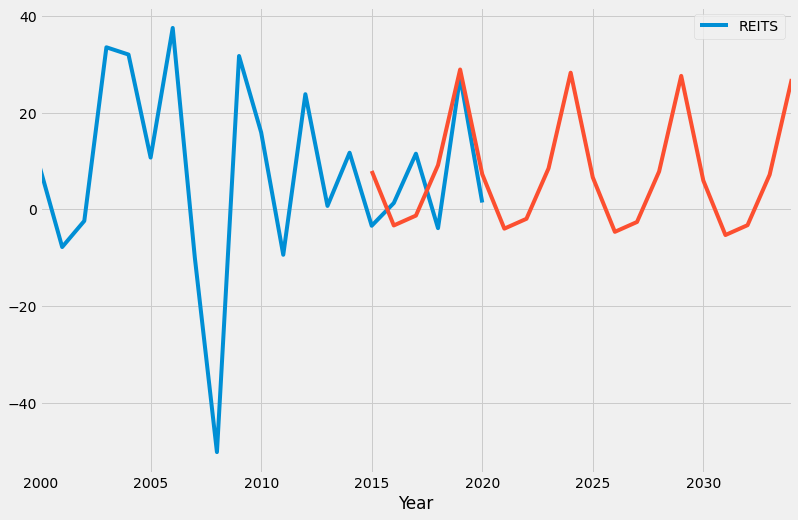

In [17]:
df.plot(figsize=(12,8))
model.forecast(20).plot()